In [1]:
import numpy as np
import pandas as pd

from time import process_time
import time

import datetime 
import arrow

import sys
import os
import re 

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams["axes.unicode_minus"]=False #用來正常顯示負號

from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname="C:/Users/s0970/python/113碩二上讀書會/吳蒨芸/TaipeiSansTCBeta-Regular.ttf")

import seaborn as sns
sns.set(font="Microsoft JhengHei") #正常顯示中文

In [8]:
import spacy
from vaderSentiment import vaderSentiment 
from textblob import TextBlob

from sklearn.metrics import confusion_matrix

In [4]:
iceland = pd.read_csv("iceland_clear.csv",index_col=0)
greece = pd.read_csv("greece_clear.csv",index_col=0)

# 冰島

### Spacy

In [5]:
def spacy_senti(text):
    
    TE = [text]
    analyzer = vaderSentiment.SentimentIntensityAnalyzer()
    sentiment = [analyzer.polarity_scores(str(s)) for s in TE]
    
    neg = sentiment[0]['neg']
    neu = sentiment[0]['neu']
    pos = sentiment[0]['pos']
    subjectivity = sentiment[0]['compound']
    
    return [neg,neu,pos,subjectivity]

In [9]:
def senti_all(text):
    k = TextBlob(text).sentiment
    
    polarity = k[0]
    subjectivity = k[1]

    return [polarity ,subjectivity]

In [21]:
iceland.translate_reviews[0]

'Overall, it is very satisfied, the room is very tidy and the bed\nThe free breakfast provided in the morning is also good.\nThe only thing is not enough to have a distance from the city. To travel to the city center, you will get to the Harpa Concert Hall to get to the city center. After getting off, you will walk to the main road of the city center.However, it is also a very special experience that recalls the local bus is also a very special experience.Bathroom has no heating'

In [20]:
senti_all(iceland.translate_reviews[0])

[0.2634798534798535, 0.5322344322344322]

In [19]:
spacy_senti(iceland.translate_reviews[0])

[0.021, 0.829, 0.149, 0.9198]

In [117]:
iceland["spacy_senti"] = iceland.translate_reviews.apply(spacy_senti)

In [118]:
iceland["spacy_senti"]

0        [0.021, 0.829, 0.149, 0.9198]
1          [0.0, 0.724, 0.276, 0.6352]
2        [0.083, 0.771, 0.146, 0.3612]
3                 [0.0, 1.0, 0.0, 0.0]
4         [0.062, 0.938, 0.0, -0.2144]
                     ...              
75591     [0.162, 0.838, 0.0, -0.4023]
75592      [0.0, 0.735, 0.265, 0.7579]
75593     [0.089, 0.9, 0.012, -0.8912]
75594    [0.073, 0.812, 0.116, 0.6794]
75595      [0.688, 0.312, 0.0, -0.296]
Name: spacy_senti, Length: 75596, dtype: object

In [119]:
def polarity_2(senti):
    
    senti_ = senti

    
    if senti_[2] -senti_[0] < 0  :
        return "不好"
    elif senti_[2] -senti_[0] > 0.2:
        return "好極了"
    elif senti_[2] -senti_[0] > 0.1:
        return "非常好"
    elif senti_[2] -senti_[0] > 0.001:
        return "好"
    else :
        return "還行"

In [120]:
iceland["senti_g_ans"] =  iceland["spacy_senti"].apply(polarity_2)

In [121]:
iceland.to_csv("iceland_senti.csv",encoding='utf-8-sig')

In [122]:
iceland.score_class.value_counts()

好極了    40280
非常好    15985
好      10633
不好      4992
還行      3706
Name: score_class, dtype: int64

In [123]:
iceland.senti_g_ans.value_counts()

好極了    36931
非常好    14055
好      10040
不好      7461
還行      7109
Name: senti_g_ans, dtype: int64

In [124]:
C = confusion_matrix(iceland.score_class, iceland.senti_g_ans, labels=["好極了", "非常好", "好","還行","不好"])
C/len(iceland.score_class)

array([[0.34286206, 0.0911953 , 0.04154982, 0.04071644, 0.01650881],
       [0.09202868, 0.04832266, 0.03297794, 0.02104609, 0.01707762],
       [0.04178793, 0.03000159, 0.02945923, 0.01740833, 0.02199852],
       [0.00709032, 0.00919361, 0.01284459, 0.00657442, 0.01332081],
       [0.00476216, 0.00720938, 0.01597968, 0.00829409, 0.02978994]])

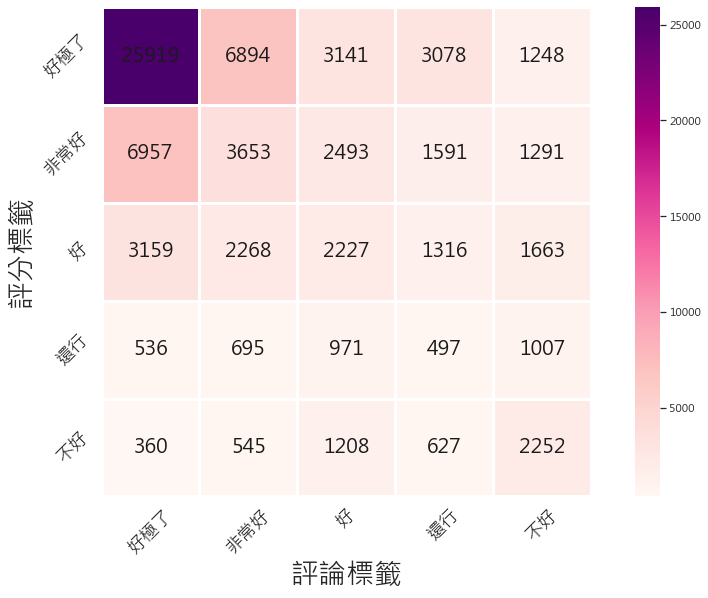

In [125]:
plt.figure(figsize=(16,9))
C = confusion_matrix(iceland.score_class, iceland.senti_g_ans, labels=["好極了", "非常好", "好","還行","不好"])
sns.heatmap(C, annot= True, fmt ="d", linewidth=3, square =True, cmap = 'RdPu',annot_kws={'size':20,'color':'k'})
plt.xlabel('評論標籤',size=28)
plt.ylabel('評分標籤',size=28)
plt.xticks([i+0.5 for i in range(5)],["好極了", "非常好", "好","還行","不好"],rotation=45,size=18)
plt.yticks([i+0.5 for i in range(5)],["好極了", "非常好", "好","還行","不好"],rotation=45,size=18)
plt.show()

### 定義真實負面標籤(皆負)

In [126]:
iceland["sentiment"] = 0
iceland.loc[(iceland.score_class=="不好")&(iceland.senti_g_ans=="不好"),"sentiment"] = 1  #兩者皆負

In [127]:
iceland.to_csv("iceland_real.csv",encoding="utf-8-sig")

In [128]:
iceland.loc[(iceland.score_class=="好極了")&(iceland.senti_g_ans=="不好"),:]

,name,category,from_country,reviews_time,title,reviews,score,translate_reviews,score_class,reviews_clear,spacy_senti,senti_g_ans,sentiment
4,ODDSSON Hotel,飯店,中國,2019-10-12,附近是66和icewear的奥特莱斯店,房间升级后很大 酒店系统出故障导致订单被取消，导致办理入住花了半个小时，但是房间升级了,9.6,"After the room is upgraded, a large hotel syst...",好極了,room upgrade large hotel system fault cause or...,"[0.062, 0.938, 0.0, -0.2144]",不好,0
25,ODDSSON Hotel,飯店,英國,2022-02-28,Best night sleep in weeks!,it was a good location to get out of the city ...,9.0,it was a good location to get out of the city ...,好極了,good location get city bed incredibly comfy se...,"[0.056, 0.894, 0.05, -0.0644]",不好,0
29,ODDSSON Hotel,飯店,英國,2022-02-25,Would stay again.,Complimentary breakfast was good but choices w...,9.0,Complimentary breakfast was good but choices w...,好極了,complimentary breakfast good choice limit last...,"[0.173, 0.69, 0.137, -0.4413]",不好,0
118,ODDSSON Hotel,飯店,荷蘭,2021-09-30,Great location and value,This is perfect for the independent traveler w...,9.0,This is perfect for the independent traveler w...,好極了,perfect independent traveler need ask staff ev...,"[0.058, 0.891, 0.051, -0.3083]",不好,0
209,ODDSSON Hotel,飯店,新加坡,2019-12-07,好極了,The restroom windows was not covered by any bl...,9.2,The restroom windows was not covered by any bl...,好極了,restroom window cover blind face office buildi...,"[0.181, 0.819, 0.0, -0.4939]",不好,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74997,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,英國,2019-05-08,Good value accommodation in excellent location...,The hot tub! No space to hang/store stuff,9.6,The hot tub! No space to hang/store stuff,好極了,hot tub space hang store stuff,"[0.263, 0.737, 0.0, -0.3595]",不好,0
75142,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,法國,2020-08-08,好極了,Le cadre et le calme étaient appreciables La l...,9.0,The frame and the calm were appreciable the be...,好極了,frame calm appreciable bed comfortable absence...,"[0.174, 0.748, 0.078, -0.4251]",不好,0
75213,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,西班牙,2019-10-30,"Cabaña en la ladera de una montaña, con el int...","La ubicación de la cabaña es inmejorable, la z...",9.0,"The location of the cabin is unbeatable, the a...",好極了,location cabin unbeatable area locate spectacu...,"[0.057, 0.943, 0.0, -0.4023]",不好,0
75418,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,愛爾蘭,2020-02-25,傑出,"Los alrededores, las vistas y la piscinita al ...",9.6,"The surroundings, the views and the outdoor po...",好極了,surroundings view outdoor pool bed comfortable,"[0.196, 0.804, 0.0, -0.4439]",不好,0


In [129]:
neg = iceland.loc[(iceland.score_class=="不好")&(iceland.senti_g_ans=="不好"),:]
neg

,name,category,from_country,reviews_time,title,reviews,score,translate_reviews,score_class,reviews_clear,spacy_senti,senti_g_ans,sentiment
344,ODDSSON Hotel,飯店,冰島,2022-03-04,It was fine but not great,"It’s nice that there is garage parking, but it...",5.0,"It’s nice that there is garage parking, but it...",不好,nice garage park extremely limit code system c...,"[0.082, 0.847, 0.07, -0.2207]",不好,1
348,ODDSSON Hotel,飯店,美國,2022-02-25,"Loved Iceland, did not especially care for the...","Breakfast was fine, I am gluten free, so not a...",4.0,"Breakfast was fine, I am gluten free, so not a...",不好,breakfast fine gluten free alot option room ab...,"[0.057, 0.888, 0.054, -0.1118]",不好,1
351,ODDSSON Hotel,飯店,美國,2022-02-22,Haunted room. No front desk service. Lack of a...,The wall paper For the cost it’s over priced. ...,3.0,The wall paper For the cost it’s over priced. ...,不好,wall paper cost price call hotel meet standard...,"[0.117, 0.794, 0.089, -0.6217]",不好,1
381,ODDSSON Hotel,飯店,英國,2021-11-28,I do not suggest coming here.,Rooms were warm Our room was only cleaned once...,4.0,Rooms were warm Our room was only cleaned once...,不好,room warm room clean 6 night stay e g bin repl...,"[0.062, 0.884, 0.054, -0.197]",不好,1
382,ODDSSON Hotel,飯店,英國,2021-11-27,The stay was comfortable except that there wer...,parking facilities and location is good There ...,5.0,parking facilities and location is good There ...,不好,park facility location good staff help special...,"[0.072, 0.883, 0.045, -0.4857]",不好,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75587,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,荷蘭,2019-10-09,"Ruime cottages, aan vernieuwing toe","Ruime, vrijstaande cottages. Op het terrein wa...",5.8,"Spacious, detached cottages.On the site there ...",不好,spacious detach cottage site hot tub general u...,"[0.095, 0.905, 0.0, -0.5574]",不好,1
75589,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,西班牙,2019-09-13,尚可,Localización y cabaña en general excepto camas...,5.0,Location and cottage in general except beds.Th...,不好,location cottage general except bed three room...,"[0.064, 0.892, 0.044, -0.25]",不好,1
75591,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,瑞士,2019-07-22,可以,Grandeur de l emplacement Lits pas confortable...,5.8,"Size of location Rooms not comfortable, shower...",不好,size location room comfortable shower dilapida...,"[0.162, 0.838, 0.0, -0.4023]",不好,1
75593,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,冰島,2019-06-11,Erfitt að eiga samskipti ef óskað er eftir ský...,Breyting á verði frá fyrstu bókun. Fyrsta bóku...,2.9,Change in price from first booking.The first b...,不好,change price first book first book 66 thous ca...,"[0.089, 0.9, 0.012, -0.8912]",不好,1


# 希臘

### spacy

In [130]:
greece["spacy_senti"] = greece.translate_reviews.apply(spacy_senti)

In [131]:
greece["senti_g_ans"] =  greece["spacy_senti"].apply(polarity_2)

In [132]:
greece.to_csv("greece_senti.csv",encoding='utf-8-sig')

In [133]:
greece.score_class.value_counts()

好極了    40818
非常好    16730
好      11010
不好      5274
還行      3802
Name: score_class, dtype: int64

In [134]:
greece.senti_g_ans.value_counts()

好極了    36462
非常好    13442
好      10209
還行      9121
不好      8400
Name: senti_g_ans, dtype: int64

In [135]:
C = confusion_matrix(greece.score_class, greece.senti_g_ans, labels=["好極了", "非常好", "好","還行","不好"])
C/len(greece.score_class)

array([[0.32820671, 0.08524616, 0.04138651, 0.05048046, 0.02045496],
       [0.08932942, 0.04539248, 0.0339542 , 0.02667646, 0.02014581],
       [0.03971198, 0.02686967, 0.02912384, 0.0221166 , 0.02399722],
       [0.00720045, 0.00844991, 0.0123786 , 0.00779298, 0.01315145],
       [0.00521679, 0.00718757, 0.01465853, 0.01042069, 0.03045058]])

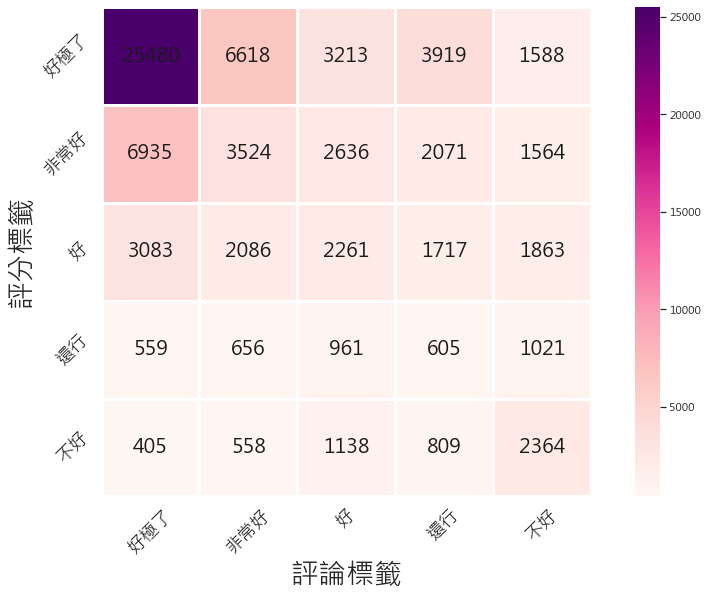

In [136]:
plt.figure(figsize=(16,9))
C = confusion_matrix(greece.score_class, greece.senti_g_ans, labels=["好極了", "非常好", "好","還行","不好"])
sns.heatmap(C, annot= True, fmt ="d", linewidth=3, square =True, cmap = 'RdPu',annot_kws={'size':20,'color':'k'})
plt.xlabel('評論標籤',size=28)
plt.ylabel('評分標籤',size=28)
plt.xticks([i+0.5 for i in range(5)],["好極了", "非常好", "好","還行","不好"],rotation=45,size=18)
plt.yticks([i+0.5 for i in range(5)],["好極了", "非常好", "好","還行","不好"],rotation=45,size=18)
plt.show()

### 負面標籤

In [137]:
greece["sentiment"] = 0
greece.loc[(greece.score_class=="不好")&(greece.senti_g_ans=="不好"),"sentiment"] = 1  #兩者皆負

In [138]:
greece.to_csv("greece_real.csv",encoding="utf-8-sig")

In [139]:
greece.loc[(greece.score_class=="好極了")&(greece.senti_g_ans=="不好"),:]

,name,category,from_country,reviews_time,title,reviews,score,translate_reviews,score_class,reviews_clear,spacy_senti,senti_g_ans,sentiment
190,Metropolis Hotel（大都市酒店）,飯店,美國,2019-09-25,傑出,The location can't be beat and of course the b...,10.0,The location can't be beat and of course the b...,好極了,location beat course breakfast help staff nega...,"[0.122, 0.789, 0.089, -0.25]",不好,0
253,Metropolis Hotel（大都市酒店）,飯店,俄羅斯,2022-01-05,好極了,"Расположение не далеко от главной площади, ори...",9.0,"Location Not far from the main square, the ref...",好極了,location far main square reference landmark ai...,"[0.027, 0.973, 0.0, -0.1779]",不好,0
269,Metropolis Hotel（大都市酒店）,飯店,波多黎各,2021-11-15,好極了,Ubicacion Ruido de la calle no es comodo para ...,9.0,Location Noise from the street is not comforta...,好極了,location noise street comfortable sleep,"[0.231, 0.769, 0.0, -0.4023]",不好,0
295,Metropolis Hotel（大都市酒店）,飯店,義大利,2021-10-17,ottima posizione,"posizione, stanza di dimensioni discrete purtr...",9.0,"Location, Discrete size room Unfortunately for...",好極了,location discrete size room unfortunately covi...,"[0.365, 0.635, 0.0, -0.5574]",不好,0
366,Metropolis Hotel（大都市酒店）,飯店,德國,2021-07-07,好極了,Sehr zentral. Dennoch ruhig.\nKostenloses Balk...,9.0,Very central.Nevertheless quiet.\nFree balcony...,好極了,central nevertheless quiet free balcony upgrad...,"[0.208, 0.632, 0.161, -0.0094]",不好,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77533,31 Doors Hotel,飯店,奧地利,2019-07-10,傑出,"Ein lautes, sehr störendes Geräusch, das in de...",9.6,"A loud, very disturbing noise, which was audib...",好極了,loud disturb noise audible regular interval ma...,"[0.158, 0.702, 0.14, -0.101]",不好,0
77617,31 Doors Hotel,飯店,土耳其,2020-03-01,好極了,Merkeze yakın olması. \nYenilenmiş olması\nBüy...,9.2,Be close to the center.\nRenewed\nBig screen T...,好極了,close center renew big screen tv breakfast bot...,"[0.092, 0.838, 0.07, -0.3506]",不好,0
77618,31 Doors Hotel,飯店,土耳其,2020-02-29,好極了,"Personeli, temizligi ve kahvaltisi Otopark sor...",9.2,"Personnel, cleanliness and breakfast parking w...",好極了,personnel cleanliness breakfast park trouble,"[0.31, 0.69, 0.0, -0.4019]",不好,0
77621,31 Doors Hotel,飯店,希臘,2019-10-28,傑出,Φοβερά δωμάτια,10.0,Terrible rooms,好極了,terrible room,"[0.756, 0.244, 0.0, -0.4767]",不好,0


In [140]:
neg = greece.loc[(greece.score_class=="不好")&(greece.senti_g_ans=="不好"),:]
neg

,name,category,from_country,reviews_time,title,reviews,score,translate_reviews,score_class,reviews_clear,spacy_senti,senti_g_ans,sentiment
142,Metropolis Hotel（大都市酒店）,飯店,賽普勒斯,2021-11-15,not worth the money,"only the lication small rooms, expensive, no b...",2.0,"only the lication small rooms, expensive, no b...",不好,lication small room expensive breakfast clean,"[0.331, 0.669, 0.0, -0.5358]",不好,1
146,Metropolis Hotel（大都市酒店）,飯店,英國,2021-10-31,It was just for one night transit. But if I we...,the receptionist and was great. Excess to the ...,5.0,the receptionist and was great. Excess to the ...,不好,receptionist great excess room complimentary k...,"[0.109, 0.817, 0.074, -0.2244]",不好,1
147,Metropolis Hotel（大都市酒店）,飯店,英國,2021-10-31,Grim small hot room,Clean Very small rooms and shower room \nFamil...,2.0,Clean Very small rooms and shower room \nFamil...,不好,clean small room shower room family room 3 bed...,"[0.132, 0.776, 0.091, -0.0571]",不好,1
158,Metropolis Hotel（大都市酒店）,飯店,賽普勒斯,2021-09-06,NOT RECOMMENDED.,The location was good but no particular view s...,3.0,The location was good but no particular view s...,不好,location good particular view since first floo...,"[0.122, 0.858, 0.019, -0.8836]",不好,1
186,Metropolis Hotel（大都市酒店）,飯店,澳洲,2019-10-14,DO NOT STAY HERE - ROOMS WERE FILTHY,Location So much. The room was for three peopl...,3.8,Location So much. The room was for three peopl...,不好,location much room three people three bed cram...,"[0.122, 0.878, 0.0, -0.8481]",不好,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77044,Faros I（法洛一世酒店）,飯店,義大利,2019-09-01,Ho soggiornato poco giusto x traghettare,Era nella norma La pulizia era scarsa,5.4,It was normal cleaning was poor,不好,normal cleaning poor,"[0.383, 0.617, 0.0, -0.4767]",不好,1
77049,Faros I（法洛一世酒店）,飯店,法國,2019-07-12,尚可,Chambre correcte avec clim parfaite. Propre Le...,5.4,Correct room with perfect air conditioning.Cle...,不好,correct room perfect air condition clean staff...,"[0.119, 0.774, 0.106, -0.1189]",不好,1
77051,Faros I（法洛一世酒店）,飯店,德國,2019-07-03,尚可,Wenig Klimaanlage defekt\nLaut\nDunkel,5.0,Little air conditioning defective\nLoud\nDark,不好,little air condition defective loud dark,"[0.345, 0.655, 0.0, -0.3892]",不好,1
77240,31 Doors Hotel,飯店,保加利亞,2020-07-12,令人失望,New modern and clean style Lack of parking pla...,4.2,New modern and clean style Lack of parking pla...,不好,new modern clean style lack park place friendl...,"[0.181, 0.658, 0.161, -0.0747]",不好,1
